# CODE OPTIMIZATION

* leaf dictionary (leaf node id -> leaf node number) for finding children ids
* precomputing children for every node
* only getting necessary values in callback

These changes improved the performance considerably. For example, for a forest of 50 trees and depth of 17, these changes brought the split constraint generation algorithm time from 150 seconds to less than one.

# TIME COMPARISON FOR SOLUTION METHODS

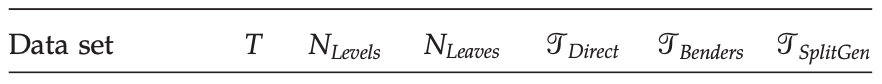
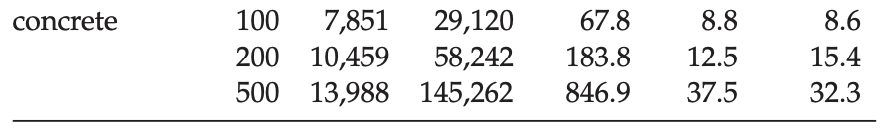

* $N_{Levels}$ (dimension of x-vector = number of splitpoints of every variable) - around 1000 splits per variable
* $N_{Leaves}$ (dimension of y-vector = number of leaves of every tree) - about 300 leaves per tree

In the paper, the authors use a maximum tree depth around 25 (only specified as *default parameters of randomForest package*).\
The EvoTrees gradient boosting algorithm produces the same number of leaves with a depth of 17.\
The same number of levels cannot be produced, since the maximum number of bins is 255.

**Thus our times are not fully comparable.**

These tree depths seem useless, at least for the gradient boosting algorithm. They inflate the solution times and possibly make the split constraint generation algorithm seem more useful.\
In the concrete demo, tree depths around 5 were seen to perform the best.

## Our model

| Trees | $N_{Levels}$ | $N_{Leaves}$ | Time direct | Time split gen |
| ----- | ------------ | ------------ |------------ | -------------- |
| 100   | 173          | 28701        | 11+2 s        | 11+19 s           |
| 200   | 173          | 50929        | 22+8 s        | 22+211 s          |
| 500   | 173          | 110680       | 58+84 s       | 58+ >500* s        |

total time = model creation and children precomputation time + optimization time

\* time limit of 500 seconds reached in the solver

### Why does our implementation perform very differently?

1. Unknown problems and inefficiencies in our code
2. Changes to Gurobi with newer versions
3. Mistakes in their code or false reporting by Misic et al.
4. Good performance of split constraint algorithm might be due to luck (see times for wine quality data)

The inconsistent performance of the splitgen algorithm in the Misic paper is very odd.

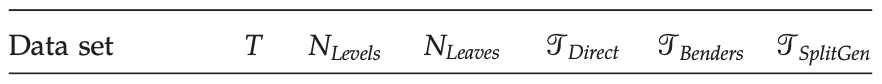
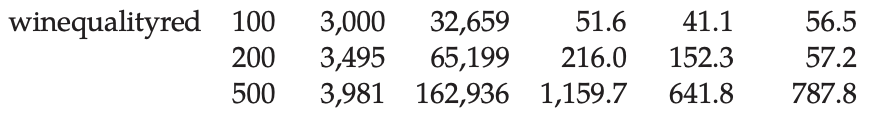

### Example: 200 trees with maximum depth of 17

#### Run with split constraint generation algorithm

```
Set parameter Presolve to value 0
Set parameter TimeLimit to value 300

TIME SPENT CREATING MODEL: 32.48 seconds

INITIAL CONSTRAINTS: 0
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 365 rows, 51102 columns and 51259 nonzeros
Model fingerprint: 0x19fe5808
Variable types: 50929 continuous, 173 integer (173 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-08, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Variable types: 50929 continuous, 173 integer (173 binary)

Root relaxation: objective 8.785397e+01, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   87.85397    0    -          -   87.85397      -     -    0s
     0     0   87.85397    0    -          -   87.85397      -     -    0s
     0     0   87.85397    0    -          -   87.85397      -     -    0s
     0     0   87.85397    0    -          -   87.85397      -     -    0s
     0     0   87.85397    0    -          -   87.85397      -     -    0s
     0     0   87.80319    0    -          -   87.80319      -     -    0s
     0     0   87.76285    0    -          -   87.76285      -     -    0s
     0     0   87.76285    0    -          -   87.76285      -     -    0s
     0     0   87.68961    0    -          -   87.68961      -     -    0s
     0     0   87.68961    0    -          -   87.68961      -     -    0s
     0     0   87.68961    0    -          -   87.68961      -     -    0s
     0     0   87.62354    0    -          -   87.62354      -     -    0s
     0     0   87.56407    0    -          -   87.56407      -     -    0s
     0     0   87.56407    0    -          -   87.56407      -     -    0s
     0     0   87.55384    0    -          -   87.55384      -     -    0s
     0     0   87.54976    0    -          -   87.54976      -     -    0s
     0     0   87.54976    0    -          -   87.54976      -     -    0s
     0     0   87.49889    0    -          -   87.49889      -     -    0s
     0     0   87.48866    0    -          -   87.48866      -     -    0s
     0     0   87.46421    0    -          -   87.46421      -     -    0s
     0     0   87.41532    0    -          -   87.41532      -     -    0s
     0     0   87.37737    0   40          -   87.37737      -     -    0s
     0     0   87.37132    0    -          -   87.37132      -     -    0s
     0     0   87.29871    0    -          -   87.29871      -     -    0s
     0     0   87.23229    0    -          -   87.23229      -     -    0s
     0     0   87.20396    0    -          -   87.20396      -     -    0s
     0     0   87.18240    0    -          -   87.18240      -     -    0s
     0     0   87.18240    0    -          -   87.18240      -     -    0s
     0     0   87.17251    0    -          -   87.17251      -     -    0s
     0     0   87.17097    0    -          -   87.17097      -     -    0s
     0     0   87.00933    0    -          -   87.00933      -     -    0s
     0     0   86.99183    0    -          -   86.99183      -     -    0s
     0     0   86.95342    0   44          -   86.95342      -     -    0s
     0     2   86.83868    0   26          -   86.83868      -     -    0s
  4506     7   84.93580    4    -          -   84.95706      -   4.0    5s
 10709    26   84.76234    4    -          -   84.76234      -   5.7   10s
 18216     0   84.63579    4    -          -   84.63579      -   6.0   15s
 25525    18   84.48197    4    -          -   84.48197      -   6.0   20s
 32609     0   84.38686    4    -          -   84.38686      -   6.1   25s
 39887     0   84.31457    5    -          -   84.31527      -   6.2   30s
 46289    66   84.22425    6    -          -   84.23915      -   6.3   35s
 52817   158   84.20010    6    -          -   84.20010      -   6.5   40s
 59314   309   84.16810    6    -          -   84.17831      -   6.7   45s
 64849   378   84.14721    6    -          -   84.14721      -   6.8   50s
 71021   911   84.08760    6    -          -   84.13012      -   6.7   55s
 77105   504   84.08801    6    -          -   84.09126      -   6.7   60s
 82641   517   84.07585    6    -          -   84.07585      -   6.7   65s
 88173   681   84.06207    6    -          -   84.06207      -   6.8   70s
 92847   825   84.04368    6    -          -   84.04792      -   6.8   75s
 98527   939   84.02476    6    -          -   84.02503      -   6.8   80s
 103221  1019   84.01647    6    -          -   84.01647      -   6.7   85s
 108831  1051   83.99685    6    -          -   83.99718      -   6.6   90s
 114440  1083   83.98436    6    -          -   83.98704      -   6.6   95s
 119024  1066   83.96897    5    -          -   83.97686      -   6.6  100s
 124626  1092   83.95753    5    -          -   83.95753      -   6.5  105s
 129217  1181   83.94987    5    -          -   83.95023      -   6.5  110s
 134814  1206   83.93836    5    -          -   83.94010      -   6.4  115s
 139383  1258   83.93241    5    -          -   83.93373      -   6.4  120s
 144019  1237   83.92500    5    -          -   83.92611      -   6.4  125s
 149628  1292   83.91312    5    -          -   83.91383      -   6.3  130s
 154241  1305   83.90084    5    -          -   83.90452      -   6.3  135s
 159814  1311   83.89520    6    -          -   83.89565      -   6.2  140s
 164517  1361   83.88919    6    -          -   83.88990      -   6.2  145s
 169095  1369   83.87784    6    -          -   83.87948      -   6.1  150s
 174729  1377   83.87368    6    -          -   83.87368      -   6.1  155s
 179336  1401   83.86475    6    -          -   83.86527      -   6.1  160s
 183902  1420   83.86294    6    -          -   83.86294      -   6.0  165s
 188574  1502   83.85923    5    -          -   83.85958      -   6.0  170s
 193126  1426   83.85485    6    -          -   83.85545      -   6.0  175s
 197812  1462   83.84996    6    -          -   83.84996      -   5.9  180s
*202390   159              14      80.0562821   83.84034  4.73%   5.9  185s
*202499   171              12      80.1387464   83.83990  4.62%   5.9  185s
*203161   258               6      80.2288659   83.83990  4.50%   5.9  185s
 204469    12   83.83213    6    -   80.22887   83.83223  4.49%   5.9  191s
*205795     1               6      83.4570832   83.82461  0.44%   5.9  193s
*205901     7               6      83.4658133   83.82345  0.43%   5.9  193s
 206252     0   83.80232    6    -   83.46581   83.80243  0.40%   5.9  195s
 207516     0   83.76159    5    -   83.46581   83.76159  0.35%   5.8  200s
*207564     0               5      83.7605390   83.76054  0.00%   5.8  200s

Cutting planes:
  Lazy constraints: 8786

Explored 207570 nodes (1213031 simplex iterations) in 200.25 seconds (220.17 work units)
Thread count was 8 (of 8 available processors)

Solution count 6: 83.7605 83.4658 83.4571 ... 80.0563

Optimal solution found (tolerance 1.00e-04)
Best objective 8.376053895006e+01, best bound 8.376053895006e+01, gap 0.0000%

User-callback calls 430746, time in user-callback 27.25 sec
GENERATED CONSTRAINTS: 8787

TIME SPENT OPTIMIZING: 200.29 seconds

SOLVED TO OPTIMALITY: 83.76053895005963
233.174990 seconds (2.23 G allocations: 37.922 GiB, 1.70% gc time, 0.31% compilation time)
```

#### Run with initial constraint generation

```
Set parameter Presolve to value 0
Set parameter TimeLimit to value 200

TIME SPENT CREATING MODEL: 32.64 seconds

INITIAL CONSTRAINTS: 101458
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 101823 rows, 51102 columns and 723794 nonzeros
Model fingerprint: 0xdd5f48da
Variable types: 50929 continuous, 173 integer (173 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-08, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 68.2380886
Variable types: 50929 continuous, 173 integer (173 binary)

Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.36s

Barrier statistics:
 Dense cols : 170
 AA' NZ     : 1.155e+06
 Factor NZ  : 2.382e+06 (roughly 80 MB of memory)
 Factor Ops : 8.624e+07 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -2.89206222e+02 -1.74633063e+01  7.33e+02 1.38e+00  5.18e+00     1s
   1   1.47024435e+02  4.92942527e+04  3.05e+02 1.09e+00  2.12e+00     1s

Barrier performed 1 iterations in 0.79 seconds (1.46 work units)
Barrier solve interrupted - model solved by another algorithm

Concurrent spin time: 0.26s (can be avoided by choosing Method=3)

Solved with dual simplex

Root relaxation: objective 8.466079e+01, 1870 iterations, 0.67 seconds (1.35 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   84.66079    0  141   68.23809   84.66079  24.1%     -    1s
H    0     0                      79.6268978   84.66079  6.32%     -    1s
     0     0   84.14537    0  133   79.62690   84.14537  5.67%     -    3s
H    0     0                      83.7605390   84.14537  0.46%     -    4s
     0     0   83.94884    0  128   83.76054   83.94884  0.22%     -    5s
     0     0   83.93517    0  116   83.76054   83.93517  0.21%     -    6s
     0     0   83.92870    0  116   83.76054   83.92870  0.20%     -    6s
     0     0   83.84627    0  141   83.76054   83.84627  0.10%     -    7s
     0     0   83.84615    0  137   83.76054   83.84615  0.10%     -    7s
     0     0     cutoff    0        83.76054   83.76054  0.00%     -    7s

Cutting planes:
  Gomory: 4
  Implied bound: 17
  MIR: 89
  Flow cover: 3
  Relax-and-lift: 194

Explored 1 nodes (7230 simplex iterations) in 7.75 seconds (19.05 work units)
Thread count was 8 (of 8 available processors)

Solution count 3: 83.7605 79.6269 68.2381 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.376053895006e+01, best bound 8.376053895006e+01, gap 0.0000%

User-callback calls 1361, time in user-callback 0.00 sec
GENERATED CONSTRAINTS: 0

TIME SPENT OPTIMIZING: 7.76 seconds

SOLVED TO OPTIMALITY: 83.76053895005963
 40.401360 seconds (1.29 G allocations: 23.316 GiB, 5.42% gc time)
```

#### Metrics of the tree model

```
N_levels: 173

N_leaves: 50929

Maxium possible number of leaves: 13107200
```

### Important observations

#### Split constraint generation algorithm performance - why the paper results seem very suspicious
Most of the time is spent optimizing, since after each lazy constraint added, the problem needs to be re-optimized.

From the log it can be seen that the time spent optimizing is $200.29-27.25=173.04$ seconds. \
That is $173.04 / 233.175 = 74 \%$ of the total time.

For a larger number of trees, this ratio is even higher.

This time use is something we cannot control?

#### Number of constraints
Initial constraint generation produces 101458 constraints.\
Split constraint generation algorithm produces 8787 constraints.

Despite the large number of constraints, the full problem is solved in under 8 seconds. Solving with the split constraint generation algorithm is considerably slower, probably because the problem needs to be re-optimized 8787 times.